# Generate histogram of releases
Code Author: Sahar El Abbadi
Date started: 2023-03-14
Date last edited: 2023-03-14

Notebook objective: to generate a histogram of Stanford releases, categorizing release by type:
- True Positive
- True Negative
- False Negative
- False Positive
- Missing data - overpass recorded in field but not as an overpass by the team
- Stanford Filtered
- Operator Filtered

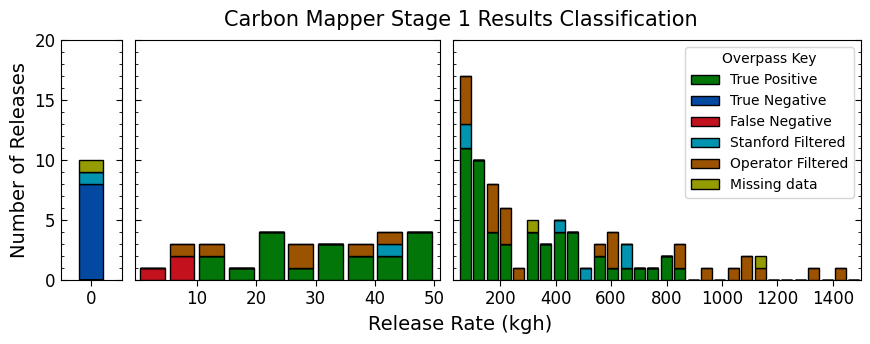

In [1]:
from plot_methods import make_releases_histogram

operator='Carbon Mapper'
stage=1
strict_discard=False

make_releases_histogram(operator, stage, strict_discard)

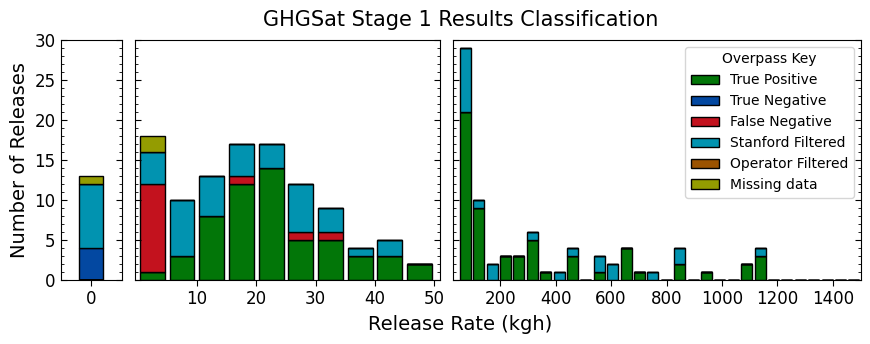

In [2]:
operator='GHGSat'
make_releases_histogram(operator, stage, strict_discard)

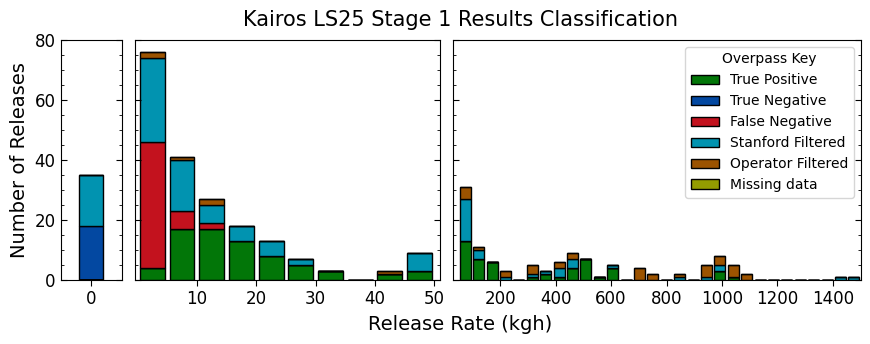

In [4]:
from plot_methods import make_releases_histogram

operator='Kairos LS25'
stage = 1
strict_discard = False
make_releases_histogram(operator, stage, strict_discard)